# 01_EDA: Exploratory Data Analysis

## Objective

The goal of this notebook is to perform exploratory data analysis (EDA) on a collection of global healthcare datasets to understand their structure, completeness, and content. This step is crucial before any data cleaning, merging, or modeling is attempted.

---

## Datasets Overview

We are working with the following datasets:

| Dataset Filename                                     | Description                                                                 |
|-----------------------------------------------------|-----------------------------------------------------------------------------|
| `IHME-GBD_2021_DATA-...csv`                         | Cause-specific mortality data by country, year, and disease                |
| `annual-healthcare-expenditure-per-capita.csv`     | Per capita healthcare spending in international dollars (PPP adjusted)     |
| `Percentage of GDP spent on Public Health.csv`      | National healthcare spending as a percentage of GDP                        |
| `hospital-beds-per-1000-people.csv`                | Hospital infrastructure availability                                       |
| `physicians-per-1000-people.csv`                   | Availability of medical professionals                                      |
| `political-corruption-index.csv`                   | Corruption and governance quality by country and year                      |
| `gdp-vs-happiness.csv`                             | Self-reported life satisfaction score (Cantril ladder)                     |

---


---



## 1. Mortality Dataset (IHME GBD 2021)

This dataset provides global cause-specific mortality statistics from 2010 to 2021. Each row represents a unique combination of country, year, sex, age group, cause of death, and metric type. It is sourced from the Global Burden of Disease (GBD) 2021 study.

### Key Columns

- `location_name`: Country or territory
- `year`: Observation year (2010–2021)
- `cause_name`: Cause of death (e.g., Stroke, HIV/AIDS)
- `metric_name`: Type of metric associated with the value:
  - `Number`: Total number of deaths (raw count)
  - `Percent`: Percentage of total deaths from this cause
  - `Rate`: Deaths per 100,000 people (**mortality rate**, commonly used in modeling)
- `val`: Numeric value corresponding to the metric
- `sex_name`: Gender category (`Male`, `Female`, or `Both`)
- `age_name`: Age group (e.g., `All ages`, `70+ years`, `15–49 years`)




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_mortality = pd.read_csv("../data/IHME-GBD_2021_DATA-cc52e0a9-1.csv")
df_mortality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154224 entries, 0 to 154223
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   measure_id     154224 non-null  int64  
 1   measure_name   154224 non-null  object 
 2   location_id    154224 non-null  int64  
 3   location_name  154224 non-null  object 
 4   sex_id         154224 non-null  int64  
 5   sex_name       154224 non-null  object 
 6   age_id         154224 non-null  int64  
 7   age_name       154224 non-null  object 
 8   cause_id       154224 non-null  int64  
 9   cause_name     154224 non-null  object 
 10  metric_id      154224 non-null  int64  
 11  metric_name    154224 non-null  object 
 12  year           154224 non-null  int64  
 13  val            154224 non-null  float64
 14  upper          154224 non-null  float64
 15  lower          154224 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 18.8+ MB


In [3]:
df_mortality.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,150,Oman,3,Both,22,All ages,717,Self-harm and interpersonal violence,1,Number,2010,57.881345,67.789830,48.477366
1,1,Deaths,150,Oman,3,Both,22,All ages,717,Self-harm and interpersonal violence,2,Percent,2010,0.006099,0.006961,0.005394
2,1,Deaths,150,Oman,3,Both,22,All ages,717,Self-harm and interpersonal violence,3,Rate,2010,2.046552,2.396894,1.714049
3,1,Deaths,36,Kazakhstan,3,Both,22,All ages,526,Digestive diseases,1,Number,2010,8895.892414,9440.837090,8293.373211
4,1,Deaths,36,Kazakhstan,3,Both,22,All ages,526,Digestive diseases,2,Percent,2010,0.059985,0.063206,0.056744


In [4]:
print("Unique countries:", df_mortality['location_name'].nunique())
print("Unique years:", sorted(df_mortality['year'].unique()))
print("Unique metric types:", df_mortality['metric_name'].unique())
print("Unique sex categories:", df_mortality['sex_name'].unique())
print("Unique age categories:", df_mortality['age_name'].nunique())
print("Unique causes:", df_mortality['cause_name'].nunique())


Unique countries: 204
Unique years: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Unique metric types: ['Number' 'Percent' 'Rate']
Unique sex categories: ['Both']
Unique age categories: 1
Unique causes: 21


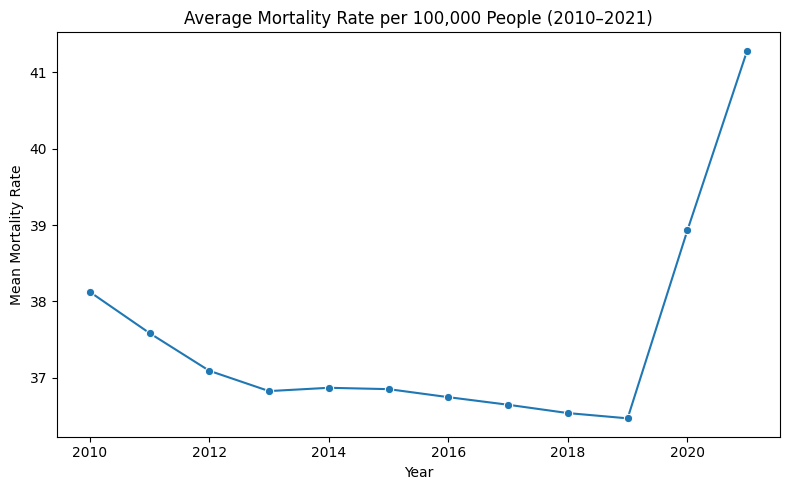

In [82]:
df_rate = df_mortality[
    (df_mortality["metric_name"] == "Rate") &
    (df_mortality["sex_name"] == "Both") &
    (df_mortality["age_name"] == "All ages")
]
avg_rate_by_year = df_rate.groupby("year")["val"].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=avg_rate_by_year.index, y=avg_rate_by_year.values, marker='o')
plt.title("Average Mortality Rate per 100,000 People (2010–2021)")
plt.xlabel("Year")
plt.ylabel("Mean Mortality Rate")
plt.tight_layout()
plt.savefig("../Visualizations/avg_mortality_rate.png")
plt.show()


## 2. Public Health Spending (% of GDP)

This dataset provides the historical share of GDP that countries allocated to public healthcare. It contains data for 51 countries across a wide timespan, from 1880 to 2023.

### Key Columns

- `Entity`: Country or region name
- `Code`: ISO 3-letter country code
- `Year`: Observation year
- `Public health expenditure as a share of GDP`: The percentage of GDP allocated to public health spending in that year

This is raw exploration — no filtering or column renaming is applied.


In [6]:
df_gdp_health = pd.read_csv("../data/Percentage of GDP spemt on Public Health.csv")
df_gdp_health.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Entity                                       2254 non-null   object 
 1   Code                                         2254 non-null   object 
 2   Year                                         2254 non-null   int64  
 3   Public health expenditure as a share of GDP  2254 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 70.6+ KB


In [7]:
df_gdp_health.head()

,Entity,Code,Year,Public health expenditure as a share of GDP
0,Argentina,ARG,1880,0.0
1,Argentina,ARG,1890,0.0
2,Argentina,ARG,1900,0.0
3,Argentina,ARG,1910,0.0
4,Argentina,ARG,1920,0.0


In [8]:
print(df_gdp_health.isnull().sum())
print(df_gdp_health.describe())


Entity                                         0
Code                                           0
Year                                           0
Public health expenditure as a share of GDP    0
dtype: int64
              Year  Public health expenditure as a share of GDP
count  2254.000000                                  2254.000000
mean   1991.701420                                     4.633832
std      29.225344                                     2.383939
min    1880.000000                                     0.000000
25%    1979.000000                                     3.174306
50%    2000.000000                                     4.754500
75%    2012.000000                                     6.227500
max    2023.000000                                    15.694000


In [9]:
print("Year range:", df_gdp_health['Year'].min(), "-", df_gdp_health['Year'].max())
print("Number of unique countries:", df_gdp_health['Entity'].nunique())



Year range: 1880 - 2023
Number of unique countries: 51


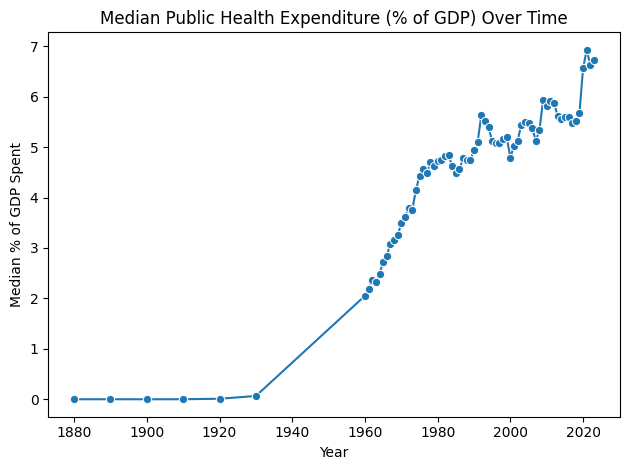

In [81]:
gdp_median_by_year = df_gdp_health.groupby('Year')[
    'Public health expenditure as a share of GDP'
].median()

plt.figure()
sns.lineplot(x=gdp_median_by_year.index, y=gdp_median_by_year.values, marker='o')
plt.title("Median Public Health Expenditure (% of GDP) Over Time")
plt.xlabel("Year")
plt.ylabel("Median % of GDP Spent")
plt.tight_layout()
plt.savefig("../Visualizations/median_public_health_expenditure.png")
plt.show()


## 3. Political Corruption Index

This dataset provides historical estimates of political corruption levels across 210 countries and territories from the year 1789 to 2024. The corruption score is an aggregated average estimate where higher values typically indicate more corruption.

### Key Columns

- `Entity`: Country or region name
- `Code`: ISO 3-letter country code (some missing)
- `Year`: Observation year
- `Political corruption index (central estimate, aggregate: average)`: Corruption score estimate (float)

This dataset is explored as-is without renaming or filtering. Note that the `Code` column contains some missing values.


In [11]:
# Load dataset
df_corruption = pd.read_csv("../data/political-corruption-index.csv")

# Overview
df_corruption.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33276 entries, 0 to 33275
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             33276 non-null  object 
 1   Code                                                               31307 non-null  object 
 2   Year                                                               33276 non-null  int64  
 3   Political corruption index (central estimate, aggregate: average)  33276 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ MB


In [12]:
# Preview
df_corruption.head()


,Entity,Code,Year,"Political corruption index (central estimate, aggregate: average)"
0,Afghanistan,AFG,1789,0.428
1,Afghanistan,AFG,1790,0.428
2,Afghanistan,AFG,1791,0.428
3,Afghanistan,AFG,1792,0.428
4,Afghanistan,AFG,1793,0.428


In [13]:
# Missing values
df_corruption.isnull().sum()


Entity                                                                  0
Code                                                                 1969
Year                                                                    0
Political corruption index (central estimate, aggregate: average)       0
dtype: int64

In [14]:
# Summary statistics
df_corruption.describe()


,Year,"Political corruption index (central estimate, aggregate: average)"
count,33276.000000,33276.000000
mean,1923.916486,0.444496
std,65.597788,0.276015
min,1789.000000,0.002000
25%,1871.000000,0.198000
50%,1933.000000,0.440234
75%,1979.000000,0.683000
max,2024.000000,0.971000


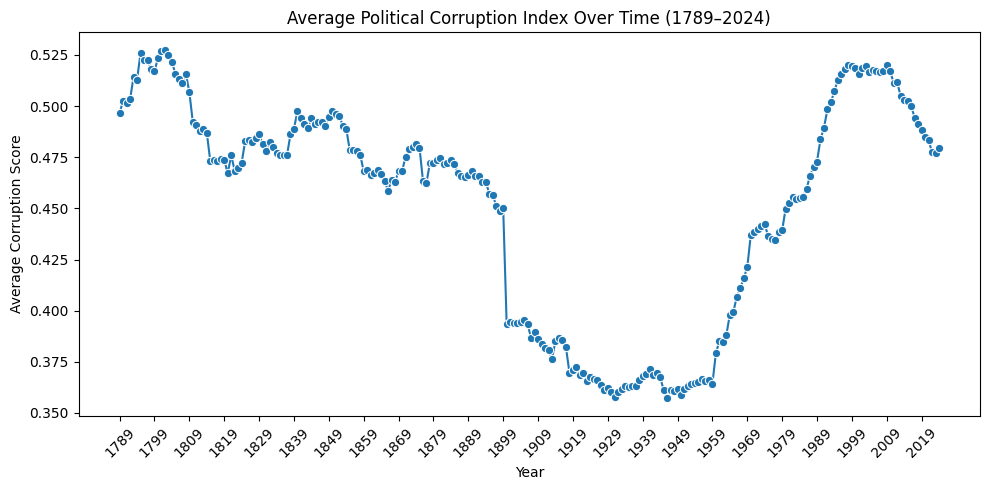

In [80]:
corruption_score_col = df_corruption.columns[3]
avg_corruption_by_year = df_corruption.groupby("Year")[corruption_score_col].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_corruption_by_year.index, y=avg_corruption_by_year.values, marker="o")
plt.title("Average Political Corruption Index Over Time (1789–2024)")
plt.xlabel("Year")
plt.ylabel("Average Corruption Score")

# Customize x-axis ticks to show every 10 years
plt.xticks(ticks=range(avg_corruption_by_year.index.min(), avg_corruption_by_year.index.max()+1, 10), rotation=45)
plt.tight_layout()
plt.savefig("../Visualizations/avg_corruption_index.png")
plt.show()


## 4. Physicians per 1,000 People

This dataset provides historical data on the availability of medical doctors (physicians) per 1,000 people for 222 countries and regions, spanning from 1960 to 2021.

### Key Columns

- `Entity`: Country or region name
- `Code`: ISO 3-letter country code (some missing)
- `Year`: Observation year
- `Physicians (per 1,000 people)`: Number of physicians per 1,000 population


In [16]:
# Load data
df_physicians = pd.read_csv("../data/physicians-per-1000-people.csv")

# Overview
df_physicians.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Entity                         4939 non-null   object 
 1   Code                           4894 non-null   object 
 2   Year                           4939 non-null   int64  
 3   Physicians (per 1,000 people)  4939 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 154.5+ KB


In [17]:
# Preview
df_physicians.head()


,Entity,Code,Year,"Physicians (per 1,000 people)"
0,Afghanistan,AFG,1960,0.035
1,Afghanistan,AFG,1965,0.063
2,Afghanistan,AFG,1970,0.065
3,Afghanistan,AFG,1981,0.077
4,Afghanistan,AFG,1986,0.183


In [18]:
# Missing values
df_physicians.isnull().sum()


Entity                            0
Code                             45
Year                              0
Physicians (per 1,000 people)     0
dtype: int64

In [19]:
# Summary statistics
df_physicians.describe()


,Year,"Physicians (per 1,000 people)"
count,4939.000000,4939.000000
mean,1996.522575,1.677102
std,16.495150,1.412196
min,1960.000000,0.004000
25%,1985.000000,0.375000
50%,1999.000000,1.400000
75%,2010.000000,2.700000
max,2021.000000,8.427000


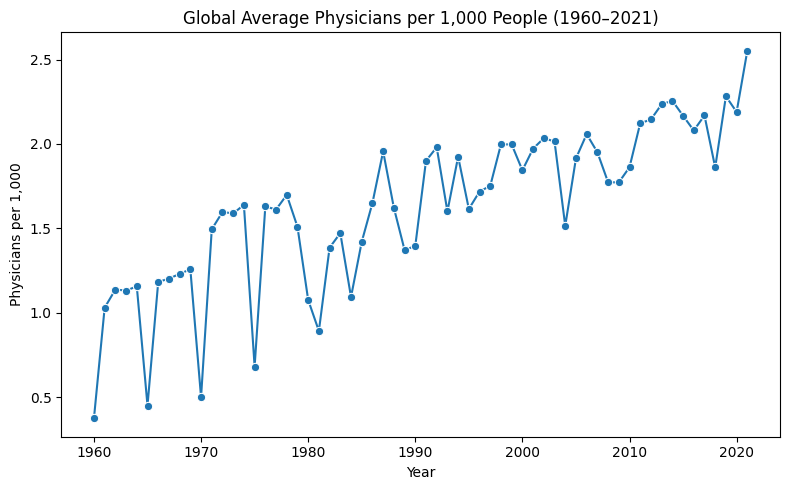

In [79]:
# Get column name for convenience
physician_col = df_physicians.columns[3]

# Compute global average by year
avg_physicians_by_year = df_physicians.groupby("Year")[physician_col].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=avg_physicians_by_year.index, y=avg_physicians_by_year.values, marker="o")
plt.title("Global Average Physicians per 1,000 People (1960–2021)")
plt.xlabel("Year")
plt.ylabel("Physicians per 1,000")
plt.tight_layout()
plt.savefig("../Visualizations/avg_physicians_per_1000_people.png")
plt.show()


## 5. Hospital Beds per 1,000 People

This dataset contains historical data on the number of hospital beds available per 1,000 people for 215 countries and territories, covering the years from 1960 to 2021.

### Key Columns

- `Entity`: Country or region name
- `Code`: ISO 3-letter country code (some missing)
- `Year`: Observation year
- `Hospital beds (per 1,000 people)`: Number of hospital beds per 1,000 population


In [21]:
# Load dataset
df_beds = pd.read_csv("../data/hospital-beds-per-1000-people.csv")

# Basic structure
df_beds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5125 entries, 0 to 5124
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Entity                            5125 non-null   object 
 1   Code                              4750 non-null   object 
 2   Year                              5125 non-null   int64  
 3   Hospital beds (per 1,000 people)  5125 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 160.3+ KB


In [22]:
# Preview
df_beds.head()


,Entity,Code,Year,"Hospital beds (per 1,000 people)"
0,Afghanistan,AFG,1960,0.170627
1,Afghanistan,AFG,1970,0.199000
2,Afghanistan,AFG,1981,0.275600
3,Afghanistan,AFG,1987,0.309100
4,Afghanistan,AFG,1990,0.249800


In [23]:
# Missing values
df_beds.isnull().sum()


Entity                                0
Code                                375
Year                                  0
Hospital beds (per 1,000 people)      0
dtype: int64

In [24]:
# Descriptive statistics
df_beds.describe()


,Year,"Hospital beds (per 1,000 people)"
count,5125.000000,5125.000000
mean,2000.819317,4.157509
std,14.811347,3.346611
min,1960.000000,0.100000
25%,1991.000000,1.647200
50%,2004.000000,3.170000
75%,2012.000000,5.850000
max,2021.000000,40.315456


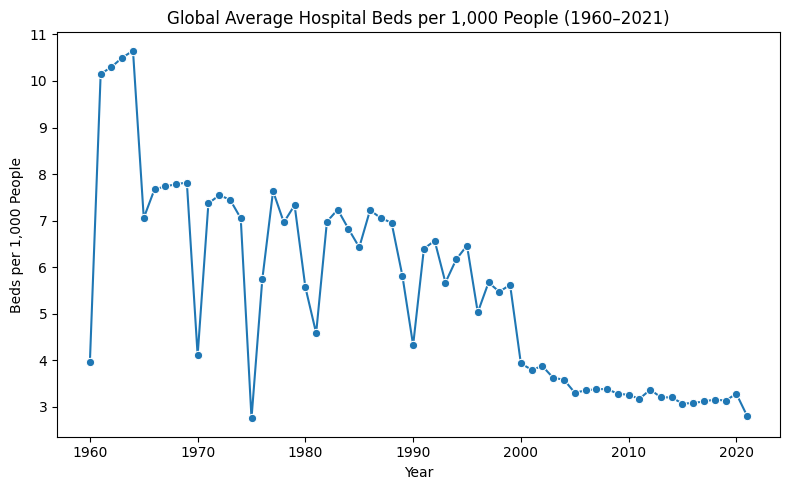

In [78]:
col_beds = df_beds.columns[3]
avg_beds_by_year = df_beds.groupby("Year")[col_beds].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=avg_beds_by_year.index, y=avg_beds_by_year.values, marker="o")
plt.title("Global Average Hospital Beds per 1,000 People (1960–2021)")
plt.xlabel("Year")
plt.ylabel("Beds per 1,000 People")
plt.tight_layout()
plt.savefig("../Visualizations/avg_beds_per_1000_people.png")
plt.show()


## 6. GDP vs. Happiness

This dataset contains GDP per capita and self-reported life satisfaction (Cantril ladder scores) across countries and years. Data spans from 1990 to 2024 and includes 294 unique entities. However, there is significant missingness in the happiness scores.

### Key Columns

- `Entity`: Country or region name
- `Code`: ISO 3-letter country code (some missing)
- `Year`: Observation year
- `Cantril ladder score`: Life satisfaction score (0–10 scale, higher is happier)
- `GDP per capita, PPP (constant 2021 international $)`: Economic wealth adjusted for purchasing power
- `World regions according to OWID`: Region (very sparse)


In [29]:
# Load data
df_happiness = pd.read_csv("../data/gdp-vs-happiness.csv")

# Basic structure
df_happiness.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7426 non-null   object 
 1   Code                                                 6872 non-null   object 
 2   Year                                                 7426 non-null   int64  
 3   Cantril ladder score                                 2112 non-null   float64
 4   GDP per capita, PPP (constant 2021 international $)  7063 non-null   float64
 5   World regions according to OWID                      271 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 348.2+ KB


In [30]:
# Preview
df_happiness.head()


,Entity,Code,Year,Cantril ladder score,"GDP per capita, PPP (constant 2021 international $)",World regions according to OWID
0,Afghanistan,AFG,2011,4.258,2757.0525,NaN
1,Afghanistan,AFG,2012,4.040,2985.3190,NaN
2,Afghanistan,AFG,2014,3.575,3017.9426,NaN
3,Afghanistan,AFG,2015,3.360,2967.6921,NaN
4,Afghanistan,AFG,2016,3.794,2958.7854,NaN


In [31]:
# Missing values
df_happiness.isnull().sum()


Entity                                                    0
Code                                                    554
Year                                                      0
Cantril ladder score                                   5314
GDP per capita, PPP (constant 2021 international $)     363
World regions according to OWID                        7155
dtype: int64

In [32]:
# Descriptive statistics
df_happiness.describe()


,Year,Cantril ladder score,"GDP per capita, PPP (constant 2021 international $)"
count,7426.000000,2112.000000,7063.000000
mean,2007.414759,5.462898,21567.903487
std,10.079833,1.115240,23684.139939
min,1990.000000,1.364000,510.822800
25%,1999.000000,4.601250,4350.824950
50%,2008.000000,5.457863,12562.891000
75%,2016.000000,6.322500,31977.909000
max,2024.000000,7.856000,174339.080000


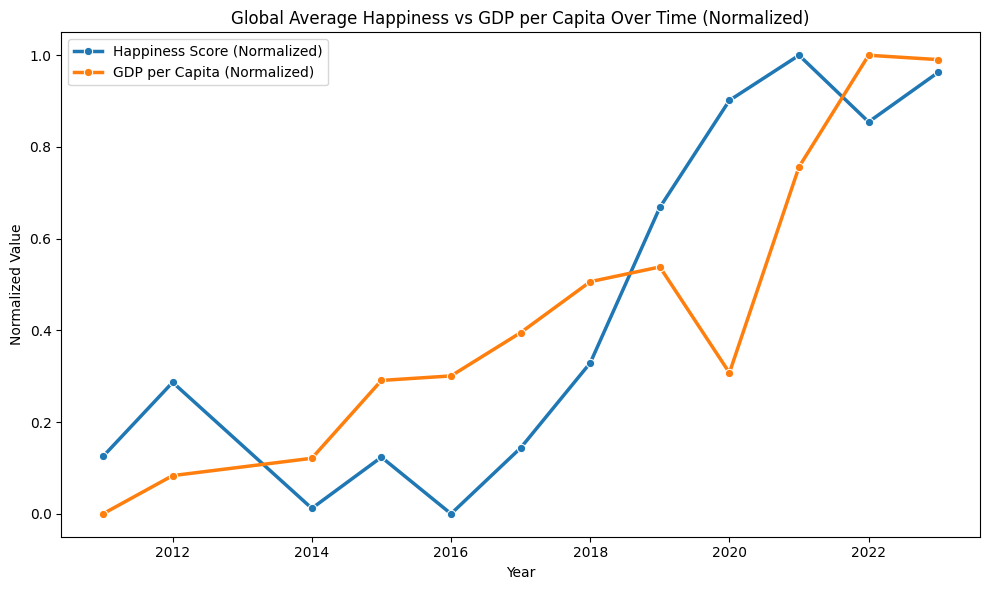

In [77]:
# Columns
happiness_col = "Cantril ladder score"
gdp_col = "GDP per capita, PPP (constant 2021 international $)"

# Drop rows with missing values in either column
df_clean = df_happiness.dropna(subset=[happiness_col, gdp_col])

# Group by year
avg_by_year = df_clean.groupby("Year")[[happiness_col, gdp_col]].mean()

# Normalize both columns for plotting on same scale
avg_by_year_norm = avg_by_year.copy()
avg_by_year_norm[happiness_col] = (avg_by_year[happiness_col] - avg_by_year[happiness_col].min()) / (avg_by_year[happiness_col].max() - avg_by_year[happiness_col].min())
avg_by_year_norm[gdp_col] = (avg_by_year[gdp_col] - avg_by_year[gdp_col].min()) / (avg_by_year[gdp_col].max() - avg_by_year[gdp_col].min())

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_by_year_norm,
             x=avg_by_year_norm.index,
             y=happiness_col, 
             label="Happiness Score (Normalized)",
             marker="o",
             linewidth=2.5)
sns.lineplot(data=avg_by_year_norm,
             x=avg_by_year_norm.index,
             y=gdp_col,
             label="GDP per Capita (Normalized)",
             marker="o",
             linewidth=2.5)

plt.title("Global Average Happiness vs GDP per Capita Over Time (Normalized)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.legend()
plt.tight_layout()
plt.savefig("../Visualizations/avg_happiness_gdp.png")
plt.show()


## 7. Annual Healthcare Expenditure Per Capita

This dataset provides the per capita health expenditure in purchasing power parity (PPP)-adjusted international dollars. It spans from 2000 to 2022 and includes 204 countries.

### Key Columns

- `Entity`: Country or region name
- `Code`: ISO 3-letter country code (some missing)
- `Year`: Observation year
- `Current health expenditure per capita, PPP (current international $)`: Per-person health spending, PPP-adjusted




In [53]:
# Load dataset
df_spending = pd.read_csv("../data/annual-healthcare-expenditure-per-capita.csv")

# Overview
df_spending.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 4 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Entity                                                                4417 non-null   object 
 1   Code                                                                  4130 non-null   object 
 2   Year                                                                  4417 non-null   int64  
 3   Current health expenditure per capita, PPP (current international $)  4417 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


In [54]:
# Preview
df_spending.head()


,Entity,Code,Year,"Current health expenditure per capita, PPP (current international $)"
0,Afghanistan,AFG,2002,87.396550
1,Afghanistan,AFG,2003,86.260340
2,Afghanistan,AFG,2004,93.952965
3,Afghanistan,AFG,2005,105.886760
4,Afghanistan,AFG,2006,118.306465


In [55]:
# Missing values
df_spending.isnull().sum()


Entity                                                                    0
Code                                                                    287
Year                                                                      0
Current health expenditure per capita, PPP (current international $)      0
dtype: int64

In [56]:
# Summary statistics
df_spending.describe()


,Year,"Current health expenditure per capita, PPP (current international $)"
count,4417.000000,4417.000000
mean,2010.577541,1229.187559
std,6.368580,1644.329801
min,2000.000000,6.343144
25%,2005.000000,170.695050
50%,2011.000000,565.473500
75%,2016.000000,1561.246200
max,2022.000000,12473.791000


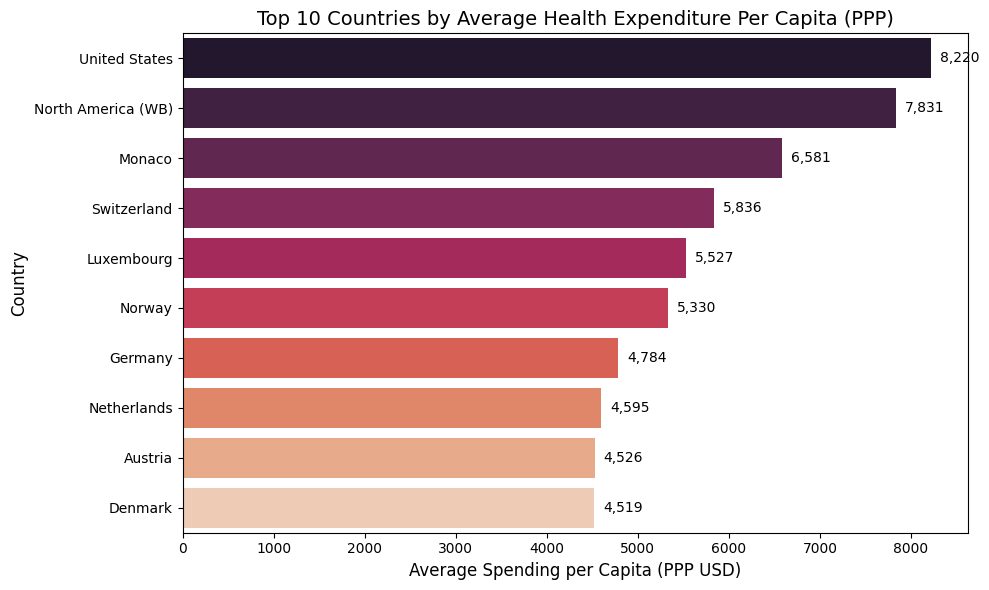

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the DataFrame
top10_df = top10_spenders.reset_index()
top10_df.columns = ['Country', 'Spending']

# Plot with crest color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10_df,
    x="Spending",
    y="Country",
    hue="Country",
    palette="rocket",
    dodge=False,
    legend=False
)

# Add value labels on the bars
for i, value in enumerate(top10_df['Spending']):
    ax.text(value + 100, i, f"{int(value):,}", va='center', fontsize=10)

# Labels and title
plt.title("Top 10 Countries by Average Health Expenditure Per Capita (PPP)", fontsize=14)
plt.xlabel("Average Spending per Capita (PPP USD)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.savefig("../Visualizations/top10_health_spending.png")
plt.show()
